# Numerische Methoden für Differentialgleichungen

## Aufgabenblatt 5
*gelöst von Stollmayer Max*

### Aufgabe 1

Zu implementieren ist eine Finite-Differenzen-Methode für $\begin{cases} u''(x)=1,\quad x \in [a,b]\\ u(a)=u_a,\quad u(b)=u_b \end{cases}$. Davon sind die Fehler mithilfe der Maximumsnorm und die Konvergenzraten zu bestimmen.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = [12.8, 7.2]

In [27]:
def TDMA(T, y):
    '''
    The Tri-Diagonal-Matrix-Algorithm is a special case of Gaussian elimination for tridiagonal matrices.
    Returns solution x of T x = y.
    
    T ... tridiagonal matrix
    y ... vector
    '''    
    
    n = len(y)-1
    
    if T.shape != (n+1, n+1):
        raise Exception(f"Input shapes are mismatched. Matrix: {T.shape}, Vector: ({n+1}).")
    
    for k in range(n+1):
        if T[k,k] == 0:
            raise Exception(f"Matrix has zero on diagonal at Matrix[{k},{k}].")
    
    a = b = c = np.zeros(n)
    d = x = np.zeros(n+1)

    c[0] = T[0,1] / T[0,0]
    d[0] = y[0] / T[0,0]
    
    for k in range(1, n):
        c[k] = T[k,k+1] / (T[k,k] - c[k-1] * T[k+1,k])
        d[k] = (y[k] - d[k-1] * T[k+1,k]) / (T[k,k] - c[k-1] * T[k+1,k])
    
    d[n] = x[n] = (y[n] - d[n-1] * T[n,n-1]) / (T[n,n] - c[n-1] * T[n,n-1])
    
    for k in range(n-1,-1,-1):
        x[k] = d[k] - c[k] * x[k+1]
    
    return x

In [64]:
def FDM(f, grid, ua, ub):
    n = len(grid)
    h = grid[1] - grid[0]
    
    y = f(grid)
    y[0] -= ua / h**2
    y[-1] -= ub / h**2
    
    T = np.diagflat(-2 * np.ones(n)) + np.diagflat(np.ones(n-1),-1) + np.diagflat(np.ones(n-1),1)
    
    return TDMA(T / h**2, y)

In [148]:
def error(vals1, vals2):
    return max(np.abs(vals1 - vals2))

def order(e, h):
    return np.log(e) / np.log(h)

def order2(errors, hs):
    n = len(errors)
    e = np.zeros(n)
    for i in range(1, n):
        e[i] = np.log(errors[i] / errors[i-1]) / np.log(hs[i] / hs[i-1])
    return np.average(e)

steps | error  | rate
   10 | 0.2200 | 0.9408
   20 | 0.1050 | 0.9788
   40 | 0.0513 | 0.9918
   80 | 0.0253 | 0.9966
  160 | 0.0126 | 0.9986
  320 | 0.0063 | 0.9994


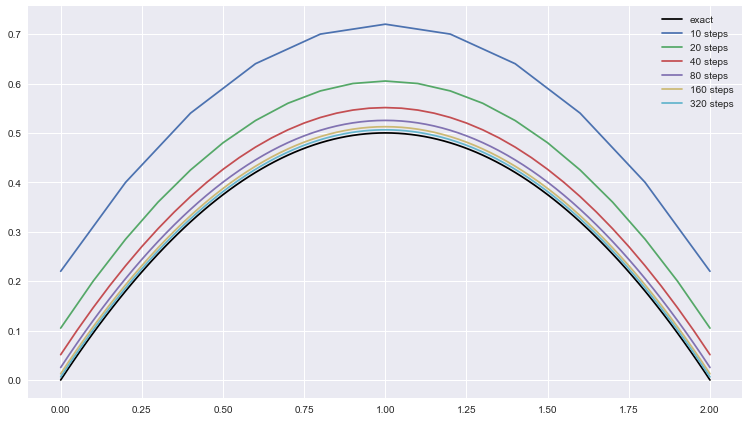

In [155]:
def f(x):
    return -1 if isinstance(x, (int, float)) else -np.ones(len(x))

def exact(x):
    return -x**2 / 2 + x

steps = 10 * 2**np.arange(6)
a = 0
b = 2
ua = ub = 0

x = np.linspace(0, 2, 101)
plt.plot(x, exact(x), "k", label="exact")

errors = ()

for N in steps:
    h = (b - a) / N
    grid = a + h * np.arange(N+1)
    u = FDM(f, grid, ua, ub)
    plt.plot(grid, u, label=f"{N} steps")
    errors += (error(u, exact(grid)),)
    rates += (order(e, h),)

rates = order(errors,(b-a)/steps)
print("steps | error  | rate")
for N, e, r in zip(steps, errors, rates):
    print(f"  {N:3g} | {e:.4f} | {r:.4f}")

plt.legend()
plt.show()

### Aufgabe 2

Analog wie Aufgabe 1 für $\begin{cases} u''(x)=x,\quad x \in [0,2]\\ u(0)=1,\quad u(2)=2 \end{cases}$.

steps | error  | rate
   10 | 0.2300 | 0.9132
   20 | 0.1155 | 0.9376
   40 | 0.0580 | 0.9506
   80 | 0.0291 | 0.9591
  160 | 0.0146 | 0.9652
  320 | 0.0073 | 0.9698


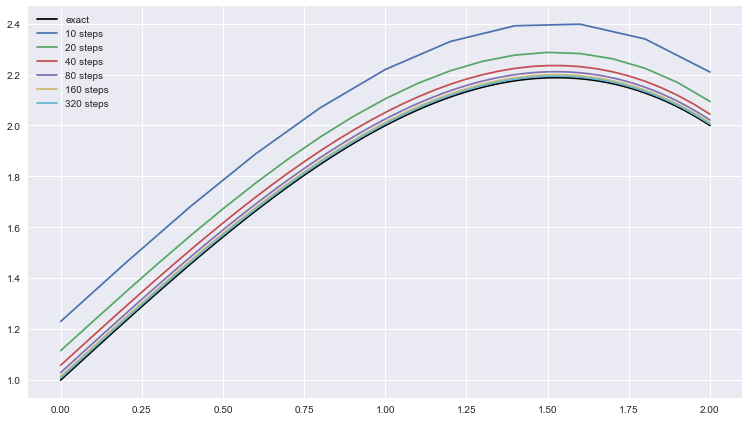

In [144]:
def f(x):
    return -x

def exact(x):
    return (-x**3 + 7*x + 6) / 6

a = 0
b = 2
ua = 1
ub = 2

x = np.linspace(0, 2, 101)
plt.plot(x, exact(x), "k", label="exact")

errors = ()
rates = ()

for N in steps:
    h = (b - a) / N
    grid = a + h * np.arange(N+1)
    u = FDM(f, grid, ua, ub)
    e = error(u, exact(grid))
    plt.plot(grid, u, label=f"{N} steps")
    errors += (e,)
    rates += (order(e, h),)

print("steps | error  | rate")
for N, e, r in zip(steps, errors, rates):
    print(f"  {N:3g} | {e:.4f} | {r:.4f}")

plt.legend()
plt.show()